In [1]:
from pandas import read_csv, DataFrame, concat, Series
from sklearn.decomposition import PCA
from IPython.display import display
from seaborn import kdeplot, distplot, set_style, despine, lmplot
from matplotlib.pyplot import figure, show, title, subplots
from itertools import combinations
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
data = read_csv('Feature/advanced_feature.csv')
x = data.drop("Level", 1)
y = data["Level"]

In [3]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
pca.n_components_

64

In [5]:
#Explained Variance
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,65)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64
Explained Variance,5.862722e+65,2.539362e+65,1.951383e+65,1.109224e+65,9.623454e+64,6.330575e+64,4.169326e+64,1.320809e+64,4.669286e+33,3.166893e+33,...,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,3.166893e+33,4.071024e+31


In [6]:
#Explained Variance Ratio
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,65)], columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64
Explained Variance Ratio,0.43,0.19,0.14,0.08,0.07,0.05,0.03,0.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Preview of PCA Transformed Data
components_applied = DataFrame(pca.transform(x))
components_applied.columns = ["P" + str(i) for i in range(1,65)]
components_applied.round(2).head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64
0,-2.832020e+32,2.470642e+32,-4.649257e+32,-2.997327e+32,-4.762754e+32,7.479826e+32,2.328500e+32,-2.722055e+31,-2.956333e+17,3.050663e+17,...,1.431232e+16,-2.180663e+16,-5.773284e+15,-7.719294e+16,6.551912e+16,3.790190e+16,6.282512e+15,4.138116e+14,5.948619e+12,-2.573468e+15
1,-4.079655e+32,1.883446e+32,-3.563151e+32,-7.444111e+31,-1.713230e+32,6.072041e+30,1.168398e+32,5.646327e+31,-1.237243e+17,2.358638e+17,...,1.144189e+16,3.337108e+16,4.522547e+16,-5.380809e+16,2.412822e+16,9.629127e+15,4.822808e+15,4.687114e+14,2.046609e+12,-1.444943e+15
2,1.231512e+32,-1.797148e+32,-4.083588e+32,-5.991411e+31,-8.341955e+31,6.776527e+31,-9.768085e+30,-1.132070e+32,2.600300e+17,1.781001e+17,...,-9.638829e+15,-3.183094e+16,2.112011e+16,-3.084693e+16,-1.283572e+16,2.337851e+16,-2.627692e+15,2.572883e+14,-2.502943e+12,4.026656e+16
3,2.171691e+32,1.181532e+31,-5.775113e+32,-7.626065e+31,1.134824e+32,3.772899e+32,-1.857033e+31,-1.883515e+32,3.351911e+17,2.275195e+17,...,-1.366914e+16,-7.498356e+16,2.485150e+15,-1.106503e+17,-2.659354e+16,4.110844e+16,-1.731958e+15,8.366545e+14,7.151003e+11,6.222547e+16
4,-1.936808e+32,8.126621e+28,-1.954844e+32,-2.633464e+32,-4.141089e+32,-3.360767e+31,5.163193e+31,8.710454e+30,-4.028787e+16,1.931824e+17,...,7.094454e+15,2.372276e+16,5.362070e+16,2.808988e+16,2.375674e+16,2.085877e+16,-4.137027e+14,-3.367230e+13,1.086433e+12,-3.757821e+14


In [8]:
#Pearson Correlations of Components with Glass Features
for p in components_applied.columns:
    new_df = x.copy()
    new_df[p] = components_applied[p]
    display(DataFrame(new_df.corr().round(2)[p]).drop(p,0).T)

,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P1,-0.48,-0.49,-0.48,-0.5,-0.47,-0.48,0.07,-0.49,-0.18,-0.17,...,0.07,0.76,0.45,0.46,0.46,0.45,0.42,0.46,0.07,0.45


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P2,-0.21,-0.19,-0.19,-0.15,-0.2,-0.15,-0.39,-0.21,-0.35,-0.36,...,-0.39,-0.18,-0.13,-0.13,-0.13,-0.1,-0.07,-0.15,-0.39,-0.15


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P3,0.66,0.67,0.67,0.66,0.65,0.64,0.2,0.66,0.68,0.69,...,0.2,-0.19,-0.36,-0.37,-0.37,-0.38,-0.36,-0.33,0.2,-0.36


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P4,0.3,0.3,0.3,0.32,0.31,0.26,-0.18,0.31,-0.56,-0.56,...,-0.18,-0.26,-0.16,-0.17,-0.17,-0.15,-0.11,-0.2,-0.18,-0.16


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P5,0.39,0.38,0.38,0.37,0.38,0.32,0.04,0.39,-0.16,-0.15,...,0.04,0.52,0.37,0.37,0.37,0.36,0.32,0.36,0.04,0.38


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P6,0.15,0.13,0.13,0.13,0.13,0.1,0.03,0.14,-0.14,-0.14,...,0.03,-0.07,0.06,0.06,0.06,0.05,0.05,0.04,0.03,0.05


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P7,0.13,0.13,0.13,0.13,0.13,0.12,0.03,0.13,-0.11,-0.1,...,0.03,-0.02,0.03,0.02,0.03,0.03,0.01,0.04,0.03,0.03


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P8,0.01,0.0,0.0,-0.0,0.0,-0.01,0.01,0.0,0.03,0.02,...,0.01,-0.07,0.69,0.68,0.68,0.67,0.65,0.63,0.01,0.69


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P9,0.15,0.16,0.16,0.17,0.16,0.17,-0.05,0.16,0.05,0.05,...,-0.05,-0.1,-0.74,-0.73,-0.73,-0.72,-0.69,-0.68,-0.05,-0.74


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P10,-0.64,-0.64,-0.65,-0.63,-0.64,-0.58,-0.18,-0.64,-0.33,-0.34,...,-0.18,-0.04,0.19,0.2,0.2,0.21,0.2,0.18,-0.18,0.19


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P11,-0.85,-0.85,-0.84,-0.83,-0.83,-0.8,-0.15,-0.85,-0.48,-0.48,...,-0.15,0.68,0.5,0.51,0.52,0.52,0.48,0.49,-0.15,0.5


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P12,-0.8,-0.78,-0.78,-0.76,-0.78,-0.69,-0.22,-0.8,-0.23,-0.24,...,-0.22,0.08,0.04,0.05,0.05,0.06,0.06,0.05,-0.22,0.04


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P13,-0.05,-0.03,-0.03,-0.03,-0.04,-0.0,-0.09,-0.05,0.54,0.53,...,-0.09,-0.17,-0.07,-0.06,-0.06,-0.04,-0.04,-0.05,-0.09,-0.07


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P14,0.05,0.04,0.04,0.07,0.05,0.05,-0.23,0.05,-0.19,-0.2,...,-0.23,-0.18,0.01,0.01,0.0,0.01,0.02,-0.01,-0.23,0.01


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P15,-0.77,-0.78,-0.78,-0.77,-0.75,-0.74,-0.13,-0.77,-0.48,-0.48,...,-0.13,0.37,0.38,0.39,0.39,0.41,0.39,0.36,-0.13,0.38


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P16,0.06,0.06,0.07,0.06,0.07,0.04,0.06,0.05,0.04,0.05,...,0.06,0.42,0.18,0.18,0.19,0.17,0.15,0.2,0.06,0.19


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P17,0.61,0.59,0.59,0.58,0.6,0.51,0.07,0.61,-0.18,-0.18,...,0.07,-0.02,-0.03,-0.04,-0.05,-0.05,-0.04,-0.06,0.07,-0.03


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P18,-0.51,-0.52,-0.52,-0.52,-0.51,-0.46,-0.05,-0.51,-0.06,-0.07,...,-0.05,-0.14,0.03,0.04,0.04,0.04,0.03,0.03,-0.05,0.03


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P19,0.89,0.89,0.89,0.87,0.87,0.83,0.2,0.89,0.6,0.6,...,0.2,-0.57,-0.49,-0.49,-0.5,-0.51,-0.48,-0.47,0.2,-0.48


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P20,-0.13,-0.15,-0.15,-0.17,-0.13,-0.18,0.15,-0.13,-0.23,-0.22,...,0.15,0.56,0.51,0.5,0.5,0.48,0.45,0.49,0.15,0.51


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P21,-0.75,-0.76,-0.76,-0.75,-0.73,-0.72,-0.16,-0.75,-0.56,-0.56,...,-0.16,0.65,0.57,0.57,0.57,0.58,0.53,0.55,-0.16,0.56


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P22,0.01,-0.01,-0.01,-0.04,0.0,-0.04,0.23,0.01,0.03,0.03,...,0.23,0.27,0.2,0.19,0.19,0.17,0.16,0.19,0.23,0.21


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P23,-0.19,-0.16,-0.16,-0.13,-0.17,-0.1,-0.33,-0.18,-0.0,-0.02,...,-0.33,-0.5,-0.34,-0.34,-0.34,-0.31,-0.27,-0.34,-0.33,-0.35


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P24,0.16,0.19,0.19,0.22,0.18,0.21,-0.2,0.17,0.21,0.19,...,-0.2,-0.44,-0.45,-0.45,-0.45,-0.43,-0.38,-0.44,-0.2,-0.46


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P25,-0.25,-0.23,-0.23,-0.19,-0.23,-0.19,-0.33,-0.25,-0.25,-0.25,...,-0.33,0.02,-0.08,-0.07,-0.07,-0.05,-0.03,-0.09,-0.33,-0.09


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P26,0.16,0.18,0.18,0.17,0.16,0.19,0.1,0.15,0.52,0.53,...,0.1,0.05,-0.26,-0.26,-0.26,-0.26,-0.26,-0.22,0.1,-0.26


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P27,0.39,0.41,0.41,0.41,0.39,0.42,0.11,0.39,0.67,0.66,...,0.11,-0.27,-0.54,-0.54,-0.54,-0.54,-0.5,-0.5,0.11,-0.54


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P28,0.08,0.08,0.08,0.08,0.1,0.06,-0.0,0.09,-0.21,-0.21,...,-0.0,-0.05,-0.22,-0.23,-0.22,-0.22,-0.2,-0.22,-0.0,-0.22


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P29,0.22,0.23,0.23,0.24,0.24,0.2,-0.05,0.22,-0.09,-0.09,...,-0.05,0.13,-0.12,-0.12,-0.12,-0.12,-0.1,-0.12,-0.05,-0.12


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P30,-0.18,-0.17,-0.17,-0.16,-0.17,-0.15,-0.06,-0.18,0.14,0.14,...,-0.06,0.31,0.16,0.17,0.17,0.17,0.15,0.17,-0.06,0.15


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P31,-0.86,-0.86,-0.86,-0.84,-0.84,-0.8,-0.27,-0.86,-0.67,-0.67,...,-0.27,0.17,0.24,0.25,0.25,0.27,0.26,0.22,-0.27,0.23


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P32,-0.26,-0.27,-0.27,-0.27,-0.27,-0.25,-0.02,-0.26,-0.06,-0.06,...,-0.02,-0.34,0.06,0.06,0.06,0.06,0.06,0.04,-0.02,0.06


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P33,-0.51,-0.51,-0.51,-0.5,-0.5,-0.47,-0.18,-0.5,-0.34,-0.35,...,-0.18,-0.14,0.09,0.09,0.09,0.1,0.1,0.07,-0.18,0.08


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P34,0.4,0.41,0.42,0.4,0.4,0.41,0.14,0.4,0.53,0.54,...,0.14,0.2,-0.3,-0.3,-0.3,-0.31,-0.31,-0.26,0.14,-0.3


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P35,0.48,0.48,0.48,0.48,0.46,0.47,0.06,0.48,0.46,0.45,...,0.06,-0.43,-0.24,-0.24,-0.25,-0.25,-0.24,-0.22,0.06,-0.24


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P36,0.15,0.16,0.16,0.15,0.14,0.18,0.12,0.14,0.6,0.6,...,0.12,-0.11,-0.15,-0.15,-0.15,-0.15,-0.17,-0.11,0.12,-0.15


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P37,-0.35,-0.34,-0.34,-0.33,-0.34,-0.31,-0.05,-0.36,-0.02,-0.01,...,-0.05,0.42,0.08,0.09,0.09,0.1,0.09,0.1,-0.05,0.08


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P38,0.29,0.31,0.31,0.34,0.3,0.32,-0.14,0.29,0.16,0.16,...,-0.14,-0.12,-0.36,-0.35,-0.35,-0.34,-0.31,-0.34,-0.14,-0.36


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P39,-0.44,-0.45,-0.45,-0.46,-0.42,-0.45,0.09,-0.44,-0.31,-0.3,...,0.09,0.59,0.39,0.4,0.4,0.38,0.36,0.38,0.09,0.4


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P40,0.22,0.22,0.22,0.18,0.22,0.17,0.28,0.22,0.15,0.17,...,0.28,0.39,0.12,0.12,0.12,0.1,0.08,0.13,0.28,0.13


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P41,-0.62,-0.62,-0.62,-0.61,-0.6,-0.58,-0.16,-0.61,-0.43,-0.44,...,-0.16,-0.13,0.15,0.15,0.15,0.16,0.17,0.12,-0.16,0.15


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P42,-0.38,-0.4,-0.4,-0.42,-0.38,-0.41,0.1,-0.39,-0.4,-0.4,...,0.1,0.72,0.39,0.4,0.4,0.38,0.34,0.39,0.1,0.4


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P43,-0.36,-0.38,-0.38,-0.39,-0.36,-0.38,0.08,-0.35,-0.33,-0.33,...,0.08,0.19,0.28,0.28,0.28,0.26,0.25,0.26,0.08,0.28


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P44,-0.21,-0.22,-0.22,-0.22,-0.22,-0.2,0.01,-0.22,0.08,0.08,...,0.01,0.55,0.45,0.46,0.46,0.45,0.4,0.46,0.01,0.45


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P45,-0.3,-0.28,-0.28,-0.27,-0.29,-0.27,-0.09,-0.3,-0.09,-0.09,...,-0.09,0.34,0.22,0.23,0.23,0.24,0.23,0.22,-0.09,0.22


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P46,0.6,0.61,0.61,0.62,0.59,0.6,-0.01,0.61,0.48,0.47,...,-0.01,-0.53,-0.4,-0.41,-0.41,-0.41,-0.38,-0.4,-0.01,-0.4


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P47,-0.6,-0.61,-0.6,-0.63,-0.59,-0.6,0.15,-0.6,-0.13,-0.12,...,0.15,0.86,0.59,0.6,0.6,0.58,0.52,0.6,0.15,0.59


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P48,0.2,0.2,0.2,0.22,0.19,0.22,-0.17,0.2,0.14,0.13,...,-0.17,-0.69,-0.39,-0.39,-0.4,-0.38,-0.35,-0.4,-0.17,-0.4


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P49,-0.68,-0.68,-0.67,-0.68,-0.67,-0.64,0.02,-0.69,-0.12,-0.11,...,0.02,0.75,0.4,0.41,0.42,0.41,0.37,0.42,0.02,0.4


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P50,0.46,0.47,0.47,0.48,0.45,0.48,-0.05,0.46,0.41,0.41,...,-0.05,-0.57,-0.43,-0.43,-0.43,-0.42,-0.4,-0.41,-0.05,-0.43


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P51,-0.2,-0.21,-0.21,-0.23,-0.2,-0.23,0.15,-0.21,0.04,0.05,...,0.15,0.86,0.64,0.65,0.65,0.63,0.57,0.64,0.15,0.65


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P52,0.13,0.16,0.16,0.17,0.13,0.19,-0.03,0.13,0.54,0.54,...,-0.03,-0.21,-0.31,-0.3,-0.3,-0.29,-0.28,-0.27,-0.03,-0.31


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P53,-0.2,-0.22,-0.22,-0.25,-0.21,-0.23,0.22,-0.2,-0.05,-0.05,...,0.22,0.17,0.22,0.22,0.22,0.2,0.17,0.23,0.22,0.23


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P54,0.58,0.59,0.59,0.6,0.57,0.58,-0.05,0.58,0.45,0.44,...,-0.05,-0.47,-0.35,-0.35,-0.36,-0.35,-0.32,-0.34,-0.05,-0.35


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P55,0.57,0.57,0.57,0.59,0.56,0.57,-0.06,0.58,0.29,0.28,...,-0.06,-0.85,-0.56,-0.57,-0.57,-0.56,-0.51,-0.56,-0.06,-0.56


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P56,0.48,0.49,0.48,0.49,0.47,0.48,0.01,0.49,0.38,0.38,...,0.01,-0.68,-0.31,-0.32,-0.32,-0.32,-0.29,-0.31,0.01,-0.31


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P57,-0.8,-0.79,-0.79,-0.75,-0.78,-0.7,-0.32,-0.8,-0.39,-0.39,...,-0.32,0.12,0.07,0.08,0.08,0.11,0.11,0.07,-0.32,0.06


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P58,0.14,0.15,0.16,0.13,0.14,0.16,0.26,0.14,0.65,0.65,...,0.26,-0.06,-0.3,-0.31,-0.3,-0.32,-0.31,-0.26,0.26,-0.3


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P59,0.63,0.62,0.62,0.61,0.61,0.59,0.16,0.64,0.46,0.45,...,0.16,-0.63,-0.37,-0.38,-0.38,-0.39,-0.37,-0.36,0.16,-0.37


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P60,-0.84,-0.83,-0.83,-0.82,-0.82,-0.77,-0.15,-0.84,-0.26,-0.26,...,-0.15,0.35,0.33,0.35,0.35,0.35,0.33,0.33,-0.15,0.33


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P61,0.61,0.6,0.6,0.6,0.59,0.56,0.06,0.61,0.18,0.18,...,0.06,-0.39,-0.15,-0.16,-0.16,-0.16,-0.16,-0.15,0.06,-0.15


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P62,-0.35,-0.35,-0.35,-0.3,-0.34,-0.3,-0.44,-0.35,-0.64,-0.65,...,-0.44,-0.19,-0.09,-0.08,-0.08,-0.05,-0.02,-0.12,-0.44,-0.1


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P63,0.06,0.08,0.07,0.11,0.06,0.1,-0.27,0.07,0.02,0.01,...,-0.27,-0.53,-0.34,-0.33,-0.34,-0.32,-0.27,-0.35,-0.27,-0.35


,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergySTFTGammaLow,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid
P64,-0.07,-0.06,-0.06,-0.05,-0.06,-0.05,-0.04,-0.07,0.01,0.01,...,-0.04,0.21,-0.56,-0.55,-0.55,-0.54,-0.53,-0.49,-0.04,-0.56


IndexError: index 2 is out of bounds for axis 0 with size 2

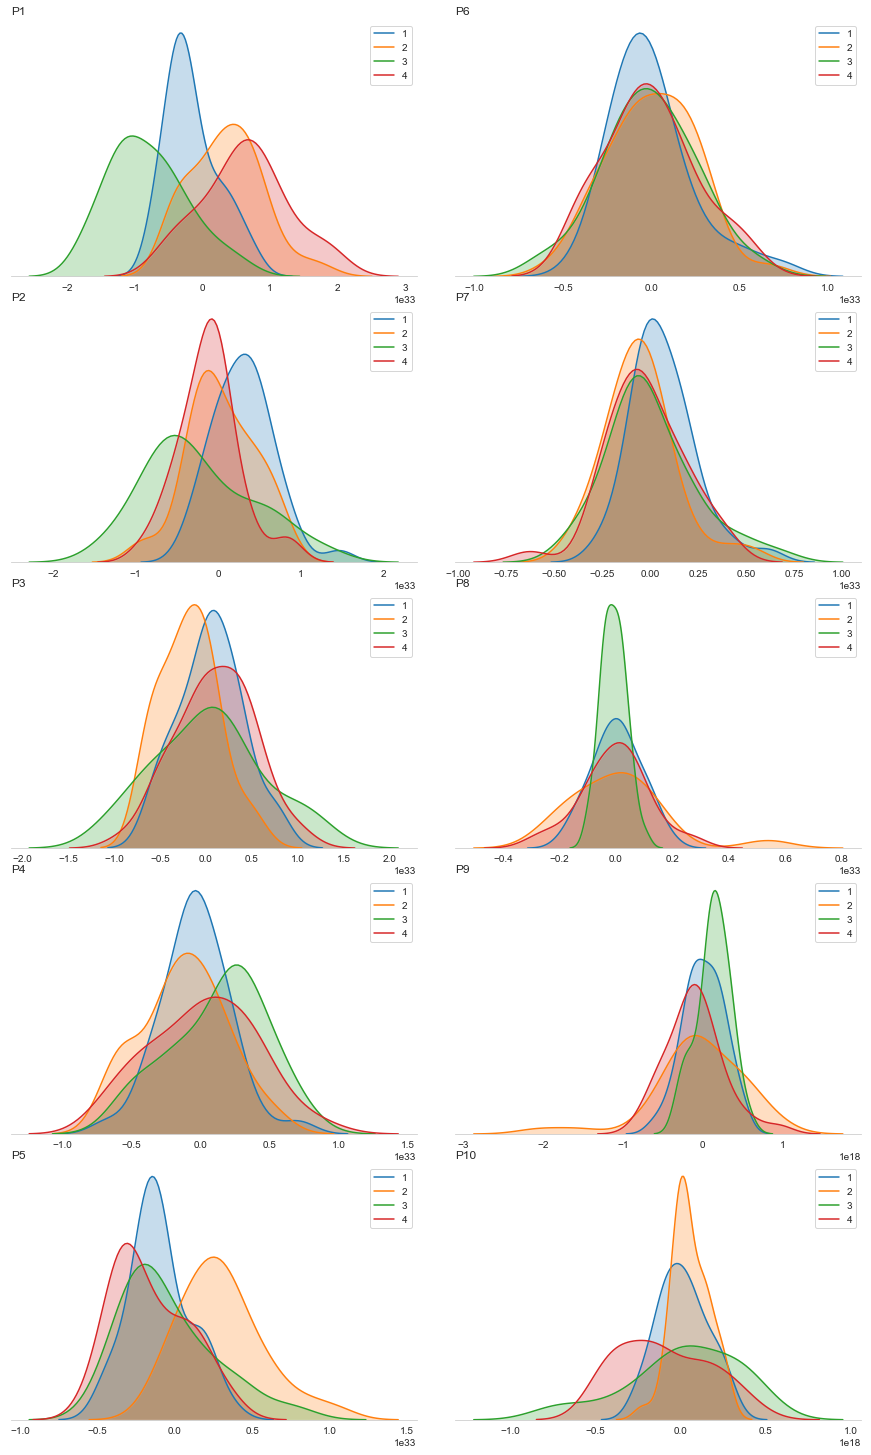

In [9]:
#Distribution Plots of Each Component by Glass Type
set_style("whitegrid")
set_style({"axes.grid":False})

for_plotting = components_applied.copy()
for_plotting["Type"] = y

n = 10
fig, axes = subplots(int(10/2),2, figsize=(12.5,20))
fig.tight_layout()
i = 0
j = 0


for p in components_applied.columns:
    
    for t in for_plotting["Type"].unique():
        data_by_type = for_plotting[for_plotting["Type"] == t]
        kdeplot(Series(data_by_type[p], name = t), shade=True, ax=axes[i][j])
        #distplot(Series(data_by_type[p], name = t), kde=False, ax=axes[i][j])
        axes[i][j].set_title(p, loc="left")
        axes[i][j].set_xlabel("",visible=False)
        axes[i][j].set_yticklabels([],visible=False)
        despine(left=True)
    i += 1
    
    if(i == n/2):
        i = 0
        j += 1
    
show()

In [10]:
sb.set(font_scale=1.2,style="whitegrid") #set styling preferences
l = pd.read_csv('Feature/advanced_feature.csv').sample(frac = .25) #read the dataset and sample 25% of it

In [11]:
#Data Wrangling
l.replace([np.inf, -np.inf], np.nan) #convert infs to nans
l = l.dropna(axis = 1, how = 'any') #remove nans
l = l.drop("Level",axis=1)
l = l._get_numeric_data() #keep only numeric features

In [12]:
#Standardize
x = l.values #convert the data into a numpy array
x = scale(x);x

c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[-1.28745435, -1.33018969, -1.33159217, ..., -0.86490597,
        -6.164414  ,  0.66377751],
       [ 0.34925716,  0.44048858,  0.42680609, ..., -0.26340615,
         0.16222142, -0.35346576],
       [ 1.122101  ,  1.1417473 ,  1.12934371, ..., -0.26340615,
         0.16222142, -0.36940763],
       ...,
       [ 1.92070631,  1.82238076,  1.80723089, ..., -0.86490366,
         0.16222142, -0.90004423],
       [ 1.84342192,  1.63675345,  1.78668886, ..., -0.26340615,
         0.16222142, -0.37168504],
       [ 0.04870678,  0.11048447,  0.10018772, ..., -0.86490487,
         0.16222142, -0.90004423]])

In [19]:
covar_matrix = PCA(n_components = 20)

In [20]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 26.8,  47.1,  63.3,  74.4,  81.5,  88. ,  92.9,  95.9,  97.6,
        98.2,  98.7,  99.1,  99.4,  99.6,  99.8,  99.9, 100. , 100. ,
       100. , 100. ])

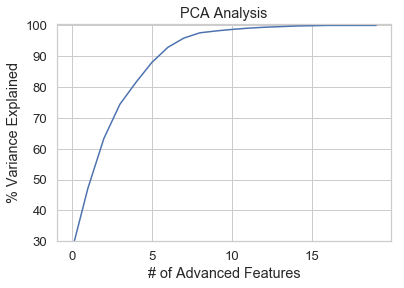

In [21]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Advanced Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)